## Determine Main Contributers to Electricity RRP

## Stage 4: Linear Regression Model for Energy Generation predictors to Energy RRP 

Creates file of Linear Regression prediction data for most significant generators in each Region

In [2]:
# Import libraries 
# I've included a handful of libraries here that might be useful
import glob
import os, zipfile
import pathlib
import operator
import pandas as pd
#Plotting Packages
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
import sys
import time
import warnings; 
from IPython.display import display # Used to display multiple pandas tables in one cell
from datetime import datetime
from datetime import timedelta
from scipy import stats
from pprint import pprint
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from IPython.display import display # Used to display multiple pandas tables in one cell
from pandas.tools.plotting import scatter_matrix

In [3]:
# Set some display options for iPython
pd.set_option('max_colwidth',100)
pd.set_option('max_rows',200)
pd.set_option('max_columns',150)
matplotlib.rcParams.update({'font.size': 15})  # default fonts in matplotlib are too small

### Change the file names according to the region required

In [4]:
RegionCombined_file ='F:/RMIT_MasterofAnalytics/LEP_DataScience/Assignments/Datasets/NSW1_Feb17_DispatchData_Interconnectors.csv'
df_Region = pd.read_csv(RegionCombined_file,sep=',',skiprows=0,error_bad_lines=False,warn_bad_lines=False)
print(df_Region.shape)

(1344, 52)


In [5]:
#Rename Output file
outputfile='F:/RMIT_MasterofAnalytics/LEP_DataScience/Assignments/Datasets/NSW1_LinearMultiplicationInterconnectors.csv'

In [6]:
df_Region.isnull().sum()
df_Region.fillna(0, inplace=True)
#df_Region = df_Region.dropna(axis=0,how='any')

In [7]:
print(df_Region.head(5))

    BLOWERNG  BOCORWF1  BROKENH1        BW01        BW02        BW03  \
0  67.439002  0.580000       0.0  479.845020  481.540012  481.149978   
1  67.435752  0.675000       0.0  446.108340  429.449992  425.895835   
2  67.464288  0.368333       0.0  428.825010  435.195823  425.820822   
3  67.450837  0.131667       0.0  447.845825  444.558330  447.683330   
4  67.435000  0.000000       0.0  430.450052  432.241660  439.516645   

         BW04   CAPTL_WF  CG1  CG2  CG3  CG4   CULLRGWF        ER01  \
0  489.030004  27.695203  0.0  0.0  0.0  0.0  10.112000  517.044996   
1  437.433350  24.160001  0.0  0.0  0.0  0.0   9.105000  489.641663   
2  444.191652  38.949333  0.0  0.0  0.0  0.0  10.768333  443.862507   
3  461.845827  50.253333  0.0  0.0  0.0  0.0  10.755000  405.033343   
4  447.474978  32.939332  0.0  0.0  0.0  0.0  12.068333  350.533305   

         ER02        ER03        ER04  ERGT01      GB01   GULLRWF1   GUNNING1  \
0  517.234986  516.535010  517.155004     0.0 -0.021896  16

### Set up Test and Training Datasets

In [8]:
X = df_Region.drop(['SETTLEMENTDATE','RRP','REGION','TOTALDEMAND'], axis = 1)
y = df_Region['RRP']
display(X.shape)
display(X.columns)

(1344, 48)

Index(['BLOWERNG', 'BOCORWF1', 'BROKENH1', 'BW01', 'BW02', 'BW03', 'BW04',
       'CAPTL_WF', 'CG1', 'CG2', 'CG3', 'CG4', 'CULLRGWF', 'ER01', 'ER02',
       'ER03', 'ER04', 'ERGT01', 'GB01', 'GULLRWF1', 'GUNNING1', 'GUTHEGA',
       'HVGTS', 'LD01', 'LD02', 'LD03', 'LD04', 'MOREESF1', 'MP1', 'MP2',
       'MURRAY', 'NYNGAN1', 'ROYALLA1', 'SHGEN', 'TALWA1', 'TARALGA1',
       'TUMUT3', 'UPPTUMUT', 'URANQ11', 'URANQ12', 'URANQ13', 'URANQ14', 'VP5',
       'VP6', 'WOODLWN1', 'N-Q-MNSP1', 'NSW1-QLD1', 'VIC1-NSW1'],
      dtype='object')

In [9]:
# prepare configuration for cross validation test harness
seed = 8

# Create Test and Training datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

print(X_test.shape)
print(y_test.shape)

#Suppress Warnings
warnings.simplefilter('ignore')

(269, 48)
(269,)


### Linear Regression Model

Lasso Model is used with positive=True to ensure coefficients are only Positive

In [10]:
# Create linear regression object
regr = Lasso(alpha=0.001,precompute=True,max_iter=1000000,positive=True, random_state=9999, selection='cyclic',tol=0.0001)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [11]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The intercept
print('Intercept: \n', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [  0.           0.05596381   0.           0.           0.           0.           0.
   0.           0.           6.88485007   0.           0.           0.           0.
   0.           0.           0.           0.          25.3117293    0.           0.
   4.00104111  31.5141277    0.           0.           0.           0.           0.
   0.           0.           0.27074086   0.           0.           0.           0.
   0.           1.44549584   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.11897391   0.        ]
Intercept: 
 -23.7737565801
Mean squared error: 161319.79
Variance score: 0.41


In [12]:
x = range(0,len(y_test))
y_test.sort()
y_pred.sort()

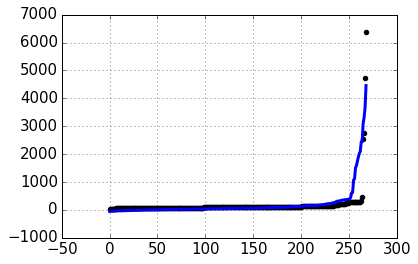

In [13]:
#Plot outputs
plt.grid()
plt.scatter(x, y_test,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)

plt.show()

In [14]:
# Put the Coefficients from the Linear Model together with the Generator Names
print(list(zip(regr.coef_, X.columns)))
RegionCoef = list(zip(regr.coef_, X.columns))

[(0.0, 'BLOWERNG'), (0.055963811586467925, 'BOCORWF1'), (0.0, 'BROKENH1'), (0.0, 'BW01'), (0.0, 'BW02'), (0.0, 'BW03'), (0.0, 'BW04'), (0.0, 'CAPTL_WF'), (0.0, 'CG1'), (6.8848500696831394, 'CG2'), (0.0, 'CG3'), (0.0, 'CG4'), (0.0, 'CULLRGWF'), (0.0, 'ER01'), (0.0, 'ER02'), (0.0, 'ER03'), (0.0, 'ER04'), (0.0, 'ERGT01'), (25.311729296241097, 'GB01'), (0.0, 'GULLRWF1'), (0.0, 'GUNNING1'), (4.0010411070465919, 'GUTHEGA'), (31.514127701737429, 'HVGTS'), (0.0, 'LD01'), (0.0, 'LD02'), (0.0, 'LD03'), (0.0, 'LD04'), (0.0, 'MOREESF1'), (0.0, 'MP1'), (0.0, 'MP2'), (0.27074085592661934, 'MURRAY'), (0.0, 'NYNGAN1'), (0.0, 'ROYALLA1'), (0.0, 'SHGEN'), (0.0, 'TALWA1'), (0.0, 'TARALGA1'), (1.4454958429710512, 'TUMUT3'), (0.0, 'UPPTUMUT'), (0.0, 'URANQ11'), (0.0, 'URANQ12'), (0.0, 'URANQ13'), (0.0, 'URANQ14'), (0.0, 'VP5'), (0.0, 'VP6'), (0.0, 'WOODLWN1'), (0.0, 'N-Q-MNSP1'), (0.11897390760583994, 'NSW1-QLD1'), (0.0, 'VIC1-NSW1')]


In [15]:
coef_dict = {}
for coef, feat in zip(regr.coef_, X.columns):
    coef_dict[feat] = coef

In [17]:
print(regr.intercept_)

-23.7737565801


In [18]:
pprint(coef_dict)

{'BLOWERNG': 0.0,
 'BOCORWF1': 0.055963811586467925,
 'BROKENH1': 0.0,
 'BW01': 0.0,
 'BW02': 0.0,
 'BW03': 0.0,
 'BW04': 0.0,
 'CAPTL_WF': 0.0,
 'CG1': 0.0,
 'CG2': 6.8848500696831394,
 'CG3': 0.0,
 'CG4': 0.0,
 'CULLRGWF': 0.0,
 'ER01': 0.0,
 'ER02': 0.0,
 'ER03': 0.0,
 'ER04': 0.0,
 'ERGT01': 0.0,
 'GB01': 25.311729296241097,
 'GULLRWF1': 0.0,
 'GUNNING1': 0.0,
 'GUTHEGA': 4.0010411070465919,
 'HVGTS': 31.514127701737429,
 'LD01': 0.0,
 'LD02': 0.0,
 'LD03': 0.0,
 'LD04': 0.0,
 'MOREESF1': 0.0,
 'MP1': 0.0,
 'MP2': 0.0,
 'MURRAY': 0.27074085592661934,
 'N-Q-MNSP1': 0.0,
 'NSW1-QLD1': 0.11897390760583994,
 'NYNGAN1': 0.0,
 'ROYALLA1': 0.0,
 'SHGEN': 0.0,
 'TALWA1': 0.0,
 'TARALGA1': 0.0,
 'TUMUT3': 1.4454958429710512,
 'UPPTUMUT': 0.0,
 'URANQ11': 0.0,
 'URANQ12': 0.0,
 'URANQ13': 0.0,
 'URANQ14': 0.0,
 'VIC1-NSW1': 0.0,
 'VP5': 0.0,
 'VP6': 0.0,
 'WOODLWN1': 0.0}


In [19]:
sorted_coef = sorted(coef_dict.items(), key=operator.itemgetter(1))

In [20]:
print(sorted_coef)

[('GUNNING1', 0.0), ('URANQ12', 0.0), ('GULLRWF1', 0.0), ('LD02', 0.0), ('ROYALLA1', 0.0), ('ER01', 0.0), ('LD04', 0.0), ('NYNGAN1', 0.0), ('CULLRGWF', 0.0), ('ER03', 0.0), ('TARALGA1', 0.0), ('TALWA1', 0.0), ('VP6', 0.0), ('UPPTUMUT', 0.0), ('CAPTL_WF', 0.0), ('BROKENH1', 0.0), ('VP5', 0.0), ('ER04', 0.0), ('MP2', 0.0), ('BW03', 0.0), ('MOREESF1', 0.0), ('BW02', 0.0), ('URANQ13', 0.0), ('VIC1-NSW1', 0.0), ('CG4', 0.0), ('URANQ14', 0.0), ('ER02', 0.0), ('SHGEN', 0.0), ('URANQ11', 0.0), ('CG1', 0.0), ('N-Q-MNSP1', 0.0), ('BW04', 0.0), ('BW01', 0.0), ('MP1', 0.0), ('LD03', 0.0), ('CG3', 0.0), ('ERGT01', 0.0), ('BLOWERNG', 0.0), ('LD01', 0.0), ('WOODLWN1', 0.0), ('BOCORWF1', 0.055963811586467925), ('NSW1-QLD1', 0.11897390760583994), ('MURRAY', 0.27074085592661934), ('TUMUT3', 1.4454958429710512), ('GUTHEGA', 4.0010411070465919), ('CG2', 6.8848500696831394), ('GB01', 25.311729296241097), ('HVGTS', 31.514127701737429)]


In [21]:
# Create Dataset of Multiplication of coefficients with original Data
Regionresult = X * regr.coef_

In [22]:
print(Regionresult.shape)
print(df_Region.shape)

(1344, 48)
(1344, 52)


In [23]:
Regionresult = pd.concat([df_Region[['SETTLEMENTDATE','RRP','REGION','TOTALDEMAND']], Regionresult], axis=1)

In [27]:
#Save result to output file
Regionresult.to_csv(outputfile,index=False)